In [ ]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
import numpy as np
import cv2
import os
from skimage.filters import unsharp_mask
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define path to your dataset
dataset_path = r"/content/drive/MyDrive/Tea_Leaf_Disease"

In [ ]:
# Define categories (classes)
CATEGORIES = ['algal_spot', 'brown_blight', 'gray_blight', 'healthy', 'helopeltis', 'red_spot']

In [ ]:
import cv2
import numpy as np

def preprocess_image(image):
    """Apply noise reduction and sharpening to the image."""
    # Resize the image to a standard size
    resized_image = cv2.resize(image, (224, 224))

    # Apply noise reduction using Non-Local Means Denoising
    denoised_image = cv2.fastNlMeansDenoisingColored(resized_image, None, h=3, templateWindowSize=7, searchWindowSize=21)

    # Apply sharpening
    sharpened_image = sharpen_image(denoised_image)
    return sharpened_image

def sharpen_image(image):
    """Apply sharpening to the image."""
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp


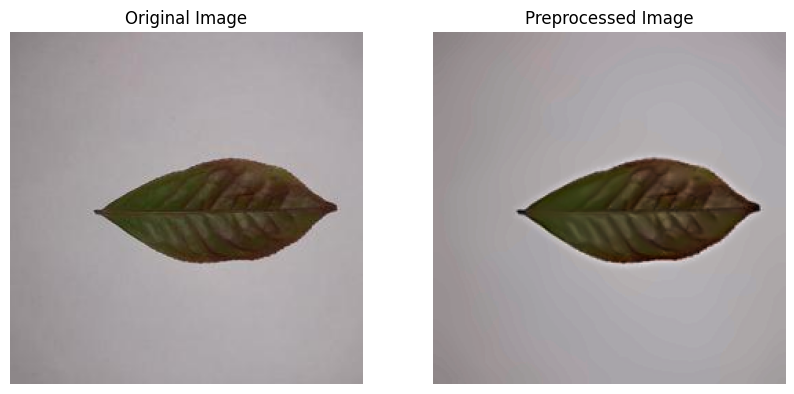

In [ ]:
import cv2
from skimage import exposure
import matplotlib.pyplot as plt
# Load the original image
image_path = r'/content/drive/MyDrive/Tea_Leaf_Disease/red_spot/20211225_223359.jpg'  # Replace with your image path
original_image = cv2.imread(image_path)
# Check if the image was loaded correctly
if original_image is not None:
    # Preprocess the image
    preprocessed_image = preprocess_image(original_image)

    # Convert to RGB for display
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    preprocessed_image_rgb = cv2.cvtColor(preprocessed_image, cv2.COLOR_BGR2RGB)

    # Display the original and preprocessed images side by side
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(preprocessed_image_rgb)
    plt.title('Preprocessed Image')
    plt.axis('off')

    plt.show()
else:
    print("Error: Image not found or path is incorrect")


In [ ]:
# Function to load and preprocess images
def load_images(path, categories, image_size):
    images = []
    labels = []
    for category in categories:
        for file in os.listdir(os.path.join(path, category)):
            img_path = os.path.join(path, category, file)
            image = cv2.imread(img_path)
            # Preprocessing techniques
            image = preprocess_image(image)
            images.append(image)
            labels.append(category)
    return np.array(images), np.array(labels)



In [ ]:
# Load images and labels
dataset_path = r'/content/drive/MyDrive/Tea_Leaf_Disease'
CATEGORIES = ['algal_spot', 'brown_blight', 'gray_blight', 'healthy', 'helopeltis', 'red_spot']  # Update with your categories
X, y = load_images(dataset_path, CATEGORIES, (224,224))

In [ ]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Fit label encoder and transform labels in y_train
y_train_encoded = label_encoder.fit_transform(y_train)
# Transform labels in y_test
y_test_encoded = label_encoder.transform(y_test)

In [ ]:

# Number of unique classes
num_classes = len(label_encoder.classes_)

In [ ]:
# Define data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# Apply data augmentation
datagen.fit(X_train)

In [ ]:
# Convert labels to one-hot encoded format
y_train_onehot = to_categorical(y_train_encoded, num_classes)
y_test_onehot = to_categorical(y_test_encoded, num_classes)

In [ ]:
from skimage import exposure

In [ ]:
pip install scikit-image

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
# Ensure all other Keras-related imports follow this pattern


# Define CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model





In [ ]:
# Define and compile your model
model = create_cnn_model(input_shape=(224, 224, 3), num_classes=num_classes)
model.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
# Train the model
history = model.fit(datagen.flow(X_train, y_train_onehot, batch_size=32), epochs=50, validation_data=(X_test, y_test_onehot))

Epoch 1/50
151/151 [==============================] - 54s 313ms/step - loss: 7.2726 - accuracy: 0.3907 - val_loss: 1.1085 - val_accuracy: 0.5449
Epoch 2/50
151/151 [==============================] - 47s 310ms/step - loss: 1.1760 - accuracy: 0.4963 - val_loss: 1.0796 - val_accuracy: 0.5458
Epoch 3/50
151/151 [==============================] - 47s 312ms/step - loss: 1.0611 - accuracy: 0.5589 - val_loss: 0.9418 - val_accuracy: 0.6256
Epoch 4/50
151/151 [==============================] - 48s 321ms/step - loss: 0.9766 - accuracy: 0.6016 - val_loss: 1.0654 - val_accuracy: 0.6140
Epoch 5/50
151/151 [==============================] - 47s 313ms/step - loss: 0.8747 - accuracy: 0.6474 - val_loss: 0.8229 - val_accuracy: 0.7113
Epoch 6/50
151/151 [==============================] - 46s 307ms/step - loss: 0.7568 - accuracy: 0.7138 - val_loss: 0.6404 - val_accuracy: 0.7895
Epoch 7/50
151/151 [==============================] - 47s 308ms/step - loss: 0.6978 - accuracy: 0.7450 - val_loss: 0.5885 - val_ac

In [ ]:
# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, y_train_onehot)
print(f"Train Accuracy: {train_accuracy}")

151/151 [==============================] - 2s 14ms/step - loss: 0.0337 - accuracy: 0.9892
Train Accuracy: 0.9891756772994995


In [ ]:

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot)
print(f"Test Accuracy: {test_accuracy}")

38/38 [==============================] - 1s 15ms/step - loss: 0.0649 - accuracy: 0.9784
Test Accuracy: 0.9783693552017212


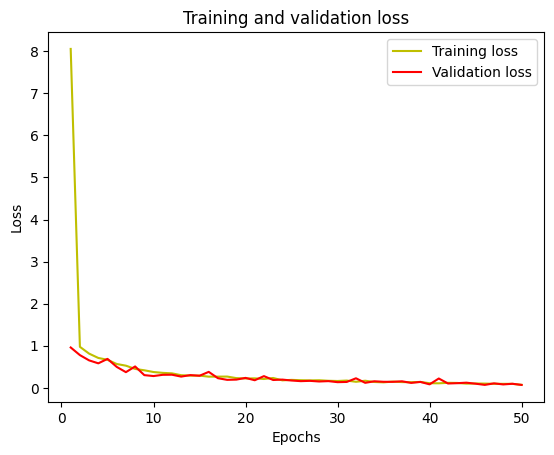

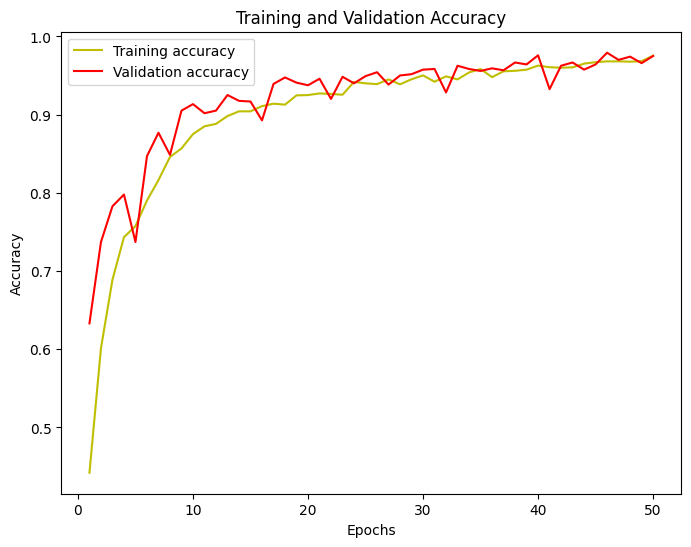

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Extract accuracy and validation accuracy from the history object
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create a range for the epochs
epochs = range(1, len(accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=[8,6])  # Optional: you can define the figure size
plt.plot(epochs, accuracy, 'y', label='Training accuracy')  # 'y' is the color yellow
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')  # 'r' is the color red
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)

38/38 [==============================] - 1s 15ms/step


In [ ]:
y_pred

array([0, 3, 4, ..., 3, 1, 2])

In [ ]:
y_test_onehot = np.argmax(y_test_onehot, axis = 1)

In [ ]:
cnn_standard_acc = accuracy_score(y_pred,y_test_onehot )
print(cnn_standard_acc)

0.9750415973377704


In [ ]:
from sklearn.metrics import classification_report


print(classification_report(y_pred, y_test_onehot))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       211
           1       0.98      0.95      0.97       221
           2       0.94      0.99      0.97       177
           3       0.99      0.94      0.97       195
           4       0.99      0.98      0.98       197
           5       0.97      1.00      0.98       201

    accuracy                           0.98      1202
   macro avg       0.97      0.98      0.97      1202
weighted avg       0.98      0.98      0.97      1202



In [ ]:
unique_labels = np.unique(y_pred)
print("Unique predicted labels:", unique_labels)


Unique predicted labels: [0 1 2 3 4 5]


In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score = jaccard_score (y_pred,y_test_onehot , average = 'weighted')
print(jaccard_score)

0.9513325634725623


In [ ]:
from sklearn.metrics import matthews_corrcoef
MCC = matthews_corrcoef (y_pred,y_test_onehot)
print(MCC)

0.970149790260589


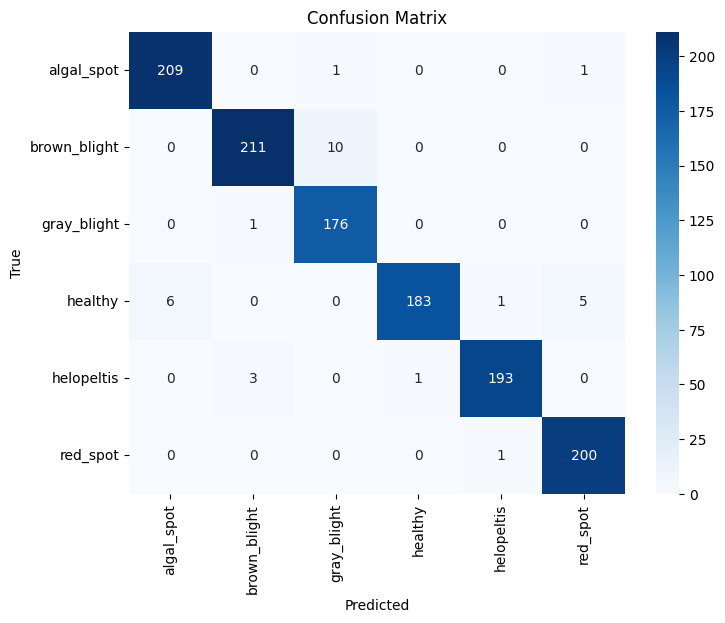

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt



# Generate confusion matrix
conf_matrix = confusion_matrix(y_pred,y_test_onehot)

# Define target names for the classes
target_names = ['algal_spot', 'brown_blight', 'gray_blight', 'healthy', 'helopeltis', 'red_spot']

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:



from tensorflow.keras.models import Model
# Create a model that will output features from the first dense layer
feature_extractor_dense = Model(inputs=model.input,
                                outputs=model.get_layer('dense').output)

In [ ]:
# For Dense layer features
features_train_dense = feature_extractor_dense.predict(X_train)
features_test_dense = feature_extractor_dense.predict(X_test)

38/38 [==============================] - 0s 11ms/step


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features_train_dense)

StandardScaler()

In [ ]:
x_tr = scaler.transform(features_train_dense)
x_te = scaler.transform(features_test_dense)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM classifier with a different C value
svm_classifier = SVC(kernel='rbf', C=0.01, gamma='scale')  # Example: Increasing C to 10.0

# Train the classifier on the scaled training data
svm_classifier.fit(x_tr, y_train)

# Predict on the scaled test data
y_pred_svm1 = svm_classifier.predict(x_te)

# Calculate the accuracy of the classifier on the test data
svm_accuracy = accuracy_score(y_test, y_pred_svm1)
print(f"SVM Test Accuracy : {svm_accuracy * 100:.2f}%")


SVM Test Accuracy : 95.92%


              precision    recall  f1-score   support

  algal_spot       0.98      0.97      0.97       215
brown_blight       0.95      0.98      0.97       215
 gray_blight       0.92      0.94      0.93       187
     healthy       0.95      0.98      0.96       184
  helopeltis       0.96      0.96      0.96       195
    red_spot       1.00      0.93      0.96       206

    accuracy                           0.96      1202
   macro avg       0.96      0.96      0.96      1202
weighted avg       0.96      0.96      0.96      1202



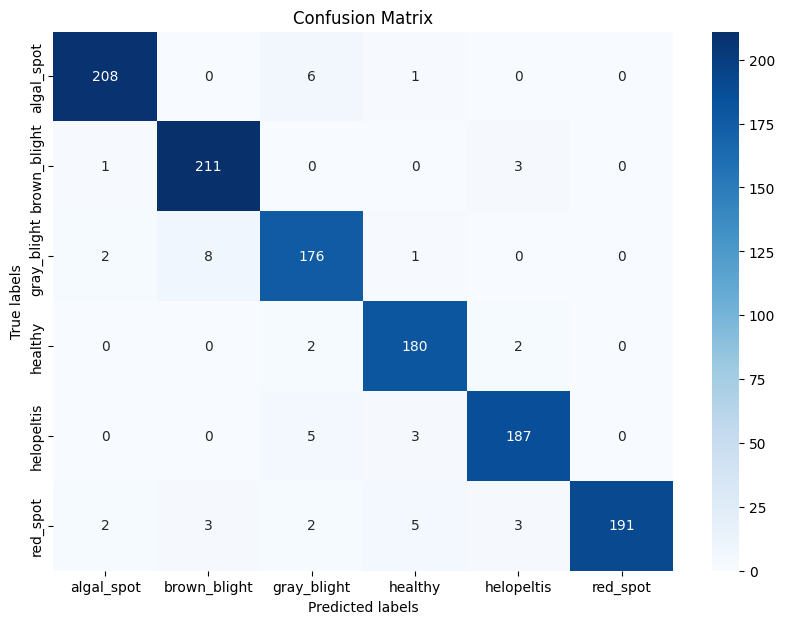

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_pred_svm and y_test are already defined from your model's predictions and the true labels
target_names = ['algal_spot', 'brown_blight', 'gray_blight', 'healthy', 'helopeltis', 'red_spot']

# Generate the classification report
print(classification_report(y_test, y_pred_svm1, target_names=target_names))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm1)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid to search with a refined scope around the best parameters
param_grid = {
    'C': [0.5, 1, 2, 5],  # Narrow down around the previously best 'C' value with more options
    'gamma': ['scale', 0.001, 0.01, 0.1, 1],  # Refine the 'gamma' options based on the previous best
}

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf')

# Initialize the GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, verbose=2, scoring='accuracy', n_jobs=-1)

# Assuming x_tr and y_train are your training data and features, fit the grid search
grid_search.fit(x_tr, y_train)  # Make sure x_tr and y_train are defined and properly preprocessed

# Print the best parameters and the best score achieved during the grid search
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Score: {grid_search.best_score_ * 100:.2f}%")

# Retrieve the best model from the grid search
best_svm_classifier = grid_search.best_estimator_

# Assuming x_te and y_test are your test data and labels
y_pred_svm = best_svm_classifier.predict(x_te)  # Make sure x_te and y_test are defined and properly preprocessed

# Calculate the accuracy of the best classifier on the test data
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Test Accuracy with best parameters: {svm_accuracy * 100:.2f}%")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 5, 'gamma': 0.001}
Best Cross-validation Score: 99.42%
SVM Test Accuracy with best parameters: 98.67%


              precision    recall  f1-score   support

  algal_spot       0.99      0.99      0.99       215
brown_blight       0.98      0.98      0.98       215
 gray_blight       0.99      0.97      0.98       187
     healthy       0.98      1.00      0.99       184
  helopeltis       0.98      0.99      0.99       195
    red_spot       1.00      0.99      0.99       206

    accuracy                           0.99      1202
   macro avg       0.99      0.99      0.99      1202
weighted avg       0.99      0.99      0.99      1202



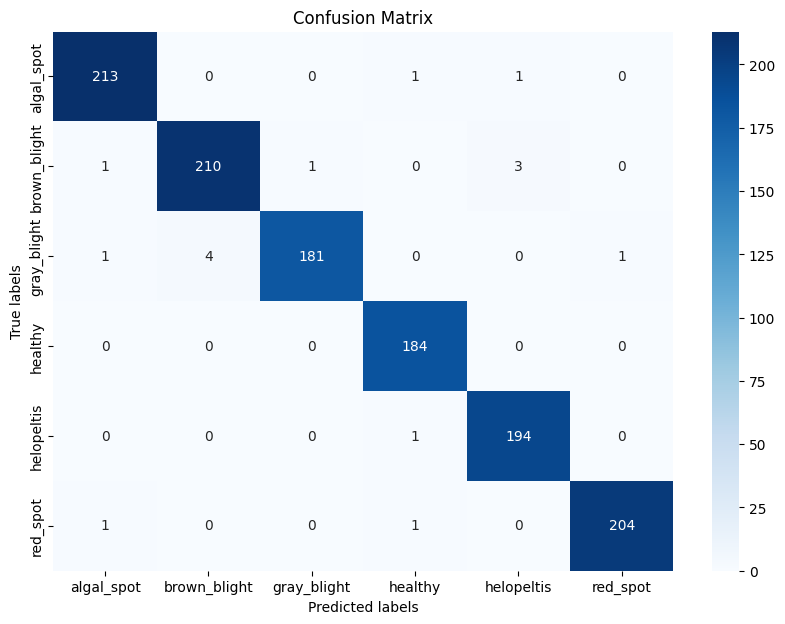

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_pred_svm and y_test are already defined from your model's predictions and the true labels
target_names = ['algal_spot', 'brown_blight', 'gray_blight', 'healthy', 'helopeltis', 'red_spot']

# Generate the classification report
print(classification_report(y_test, y_pred_svm, target_names=target_names))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred_svm)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=3, max_depth=None, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(x_tr, y_train)

# Predict on the test data
y_pred_rf1 = rf_classifier.predict(x_te)

# Calculate the accuracy of the classifier on the test data
rf_accuracy = accuracy_score(y_test, y_pred_rf1)
print(f"Random Forest Test Accuracy: {rf_accuracy * 100:.2f}%")


Random Forest Test Accuracy: 95.34%


              precision    recall  f1-score   support

  algal_spot       0.96      0.98      0.97       215
brown_blight       0.95      0.95      0.95       215
 gray_blight       0.95      0.93      0.94       187
     healthy       0.95      0.95      0.95       184
  helopeltis       0.96      0.95      0.96       195
    red_spot       0.96      0.95      0.95       206

    accuracy                           0.95      1202
   macro avg       0.95      0.95      0.95      1202
weighted avg       0.95      0.95      0.95      1202



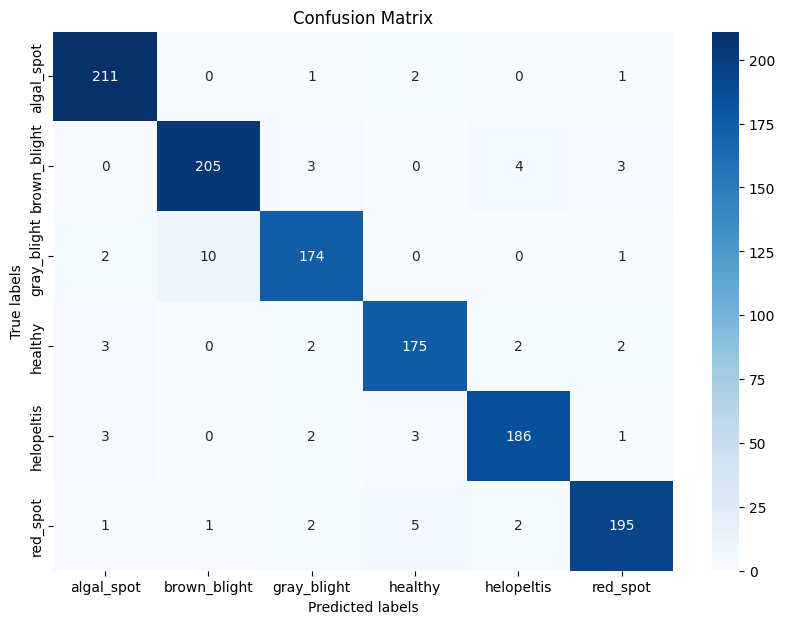

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_pred_svm and y_test are already defined from your model's predictions and the true labels
target_names = ['algal_spot', 'brown_blight', 'gray_blight', 'healthy', 'helopeltis', 'red_spot']

# Generate the classification report
print(classification_report(y_test, y_pred_rf1, target_names=target_names))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred_rf1)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Simplified parameter grid to reduce computational cost
param_grid_simplified = {
    'n_estimators': [100, 200],  # Limited range of trees
    'max_depth': [10, 20, None],  # Focus on potentially optimal depth without going too deep
    'min_samples_split': [2, 10],  # Broader steps to evaluate the effect of split criteria
    'min_samples_leaf': [1, 4],  # Minimal variation to assess impact on performance
    # Removed 'max_features' and 'bootstrap' to simplify and reduce computation
}

# Initialize the Random Forest classifier with a random state for reproducibility
rf_classifier_simplified = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with the simplified parameter grid
grid_search_rf_simplified = GridSearchCV(
    estimator=rf_classifier_simplified,
    param_grid=param_grid_simplified,
    cv=3,  # Keeping a modest number of folds
    verbose=2,
    scoring='accuracy',
    n_jobs=-1  # Use all available CPUs
)

# Fit the simplified grid search to the data
grid_search_rf_simplified.fit(x_tr, y_train)  # Ensure x_tr and y_train are properly defined

# Print the best parameters and the best score from the simplified grid search
print(f"Simplified Best Parameters: {grid_search_rf_simplified.best_params_}")
print(f"Simplified Best Cross-validation Score: {grid_search_rf_simplified.best_score_ * 100:.2f}%")

# Retrieve the best model from the simplified grid search
best_rf_classifier_simplified = grid_search_rf_simplified.best_estimator_

# Predict on the test data using the best simplified model
y_pred_rf_best_simplified = best_rf_classifier_simplified.predict(x_te)  # Ensure x_te and y_test are properly defined

# Calculate the accuracy of the best simplified classifier on the test data
rf_best_simplified_accuracy = accuracy_score(y_test, y_pred_rf_best_simplified)
print(f"Best Simplified Random Forest Test Accuracy: {rf_best_simplified_accuracy * 100:.2f}%")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Simplified Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Simplified Best Cross-validation Score: 98.96%
Best Simplified Random Forest Test Accuracy: 98.25%


              precision    recall  f1-score   support

  algal_spot       0.99      1.00      0.99       215
brown_blight       0.97      0.97      0.97       215
 gray_blight       0.98      0.96      0.97       187
     healthy       0.98      0.99      0.99       184
  helopeltis       0.98      0.98      0.98       195
    red_spot       1.00      0.99      0.99       206

    accuracy                           0.98      1202
   macro avg       0.98      0.98      0.98      1202
weighted avg       0.98      0.98      0.98      1202



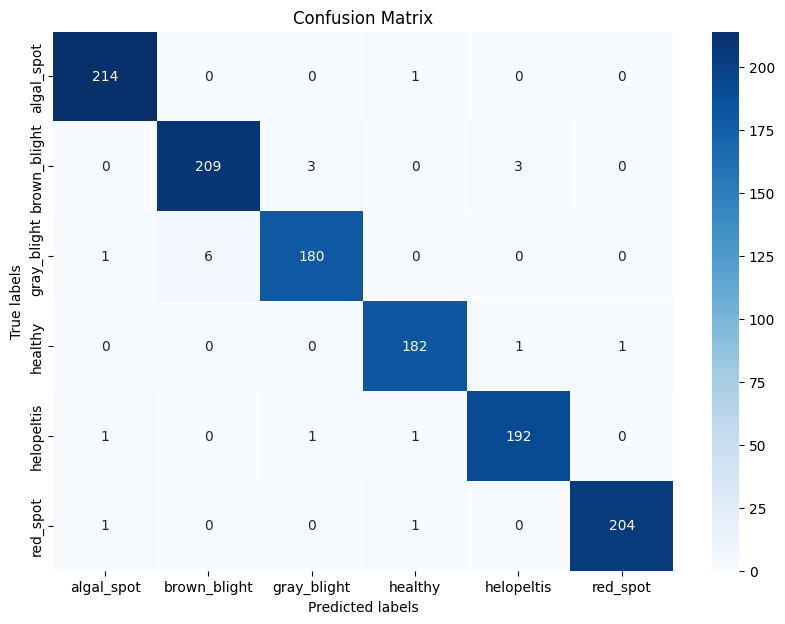

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_pred_svm and y_test are already defined from your model's predictions and the true labels
target_names = ['algal_spot', 'brown_blight', 'gray_blight', 'healthy', 'helopeltis', 'red_spot']

# Generate the classification report
print(classification_report(y_test,y_pred_rf_best_simplified, target_names=target_names))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf_best_simplified)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=500)

# Train the classifier on the training data
knn_classifier.fit(x_tr, y_train)

# Predict on the test data
y_pred_knn1 = knn_classifier.predict(x_te)

# Calculate the accuracy of the classifier on the test data
knn_accuracy = accuracy_score(y_test, y_pred_knn1)
print(f"KNN Test Accuracy: {knn_accuracy * 100:.2f}%")


KNN Test Accuracy: 94.34%


              precision    recall  f1-score   support

  algal_spot       0.91      1.00      0.95       215
brown_blight       0.95      0.93      0.94       215
 gray_blight       1.00      0.84      0.91       187
     healthy       0.90      1.00      0.95       184
  helopeltis       0.93      0.96      0.95       195
    red_spot       0.98      0.92      0.95       206

    accuracy                           0.94      1202
   macro avg       0.95      0.94      0.94      1202
weighted avg       0.95      0.94      0.94      1202



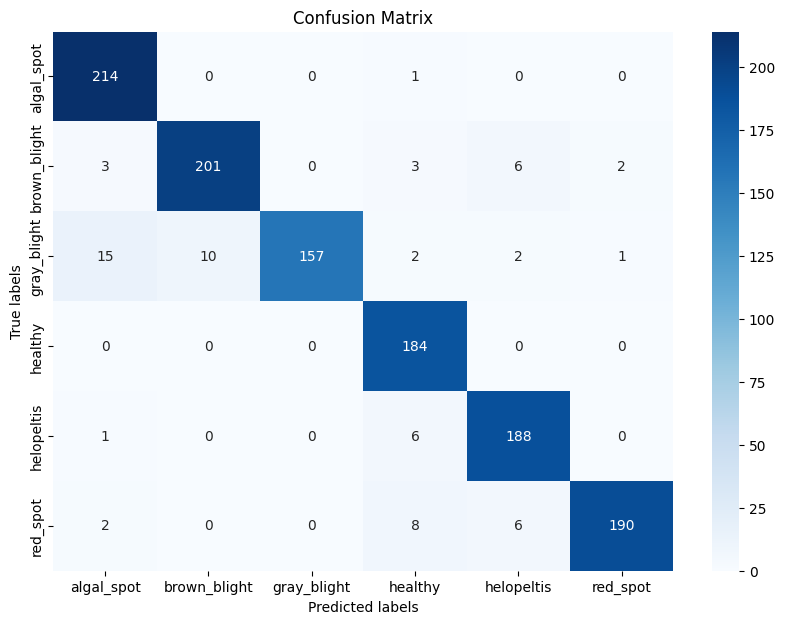

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_pred_svm and y_test are already defined from your model's predictions and the true labels
target_names = ['algal_spot', 'brown_blight', 'gray_blight', 'healthy', 'helopeltis', 'red_spot']

# Generate the classification report
print(classification_report(y_test, y_pred_knn1, target_names=target_names))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred_knn1)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Assuming x_tr, x_te, y_train, and y_test are already defined and that x_tr and x_te are scaled

# Define the parameter grid for KNN specific parameters
param_grid = {
    'n_neighbors': [3, 5, 10, 20, 50, 100, 200, 300, 400, 500],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Initialize GridSearchCV with the KNN classifier
grid_search_knn = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy', verbose=2)

# Perform grid search to find the best parameters using the already scaled training data
grid_search_knn.fit(x_tr, y_train)

# Retrieve the best parameters from the grid search
best_params_knn = grid_search_knn.best_params_
# Retrieve the best model from the grid search
best_knn_classifier = grid_search_knn.best_estimator_

# Print the best parameters and the best cross-validation score
print(f"Best Parameters: {best_params_knn}")
print(f"Best Cross-validation Score: {grid_search_knn.best_score_ * 100:.2f}%")

# Predict on the scaled test data using the best model
y_pred_knn_best = best_knn_classifier.predict(x_te)

# Calculate the accuracy of the best classifier on the test data
best_knn_accuracy = accuracy_score(y_test, y_pred_knn_best)
print(f"Best KNN Test Accuracy: {best_knn_accuracy * 100:.2f}%")


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=5, we

              precision    recall  f1-score   support

  algal_spot       0.99      1.00      0.99       215
brown_blight       0.94      0.98      0.96       215
 gray_blight       1.00      0.90      0.95       187
     healthy       0.98      0.99      0.99       184
  helopeltis       0.97      0.99      0.98       195
    red_spot       1.00      0.99      0.99       206

    accuracy                           0.98      1202
   macro avg       0.98      0.98      0.98      1202
weighted avg       0.98      0.98      0.98      1202



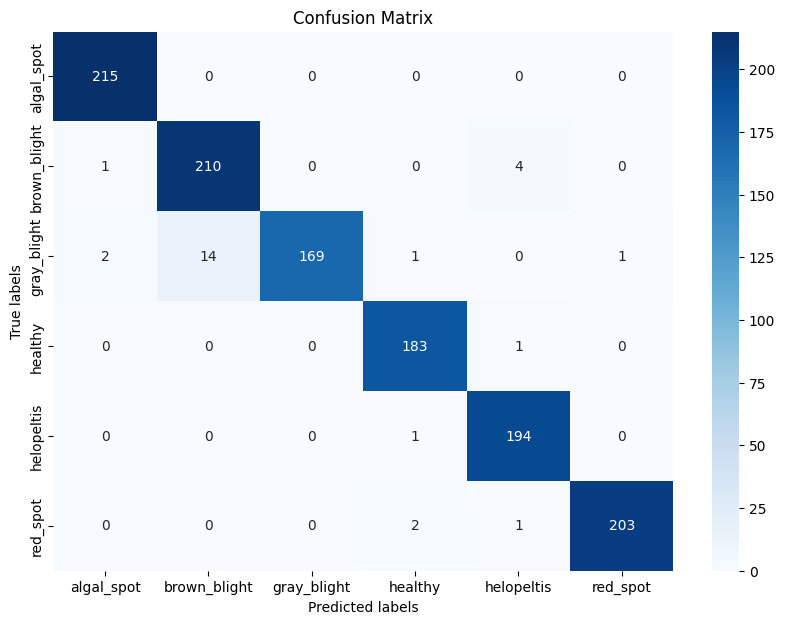

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_pred_svm and y_test are already defined from your model's predictions and the true labels
target_names = ['algal_spot', 'brown_blight', 'gray_blight', 'healthy', 'helopeltis', 'red_spot']

# Generate the classification report
print(classification_report(y_test, y_pred_knn_best, target_names=target_names))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred_knn_best)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBoost classifier with the correct objective for multi-class classification
xgb_classifier = xgb.XGBClassifier(objective='multi:softprob',
                                   eval_metric='mlogloss',
                                   n_estimators=1,
                                   random_state=42,
                                   use_label_encoder=False)  # Add other parameters as needed

# Train the classifier on the training data
xgb_classifier.fit(x_tr, y_train_encoded)

# Predict on the test data
y_pred_xgb1 = xgb_classifier.predict(x_te)

# Calculate the accuracy of the classifier on the test data
xgb_accuracy = accuracy_score(y_test_encoded, y_pred_xgb1)
print(f"XGB Test Accuracy: {xgb_accuracy* 100:.2f}%")




XGB Test Accuracy: 93.59%


              precision    recall  f1-score   support

  algal_spot       0.95      0.98      0.96       215
brown_blight       0.96      0.85      0.90       215
 gray_blight       0.88      0.91      0.90       187
     healthy       0.95      0.97      0.96       184
  helopeltis       0.93      0.94      0.94       195
    red_spot       0.95      0.97      0.96       206

    accuracy                           0.94      1202
   macro avg       0.94      0.94      0.94      1202
weighted avg       0.94      0.94      0.94      1202



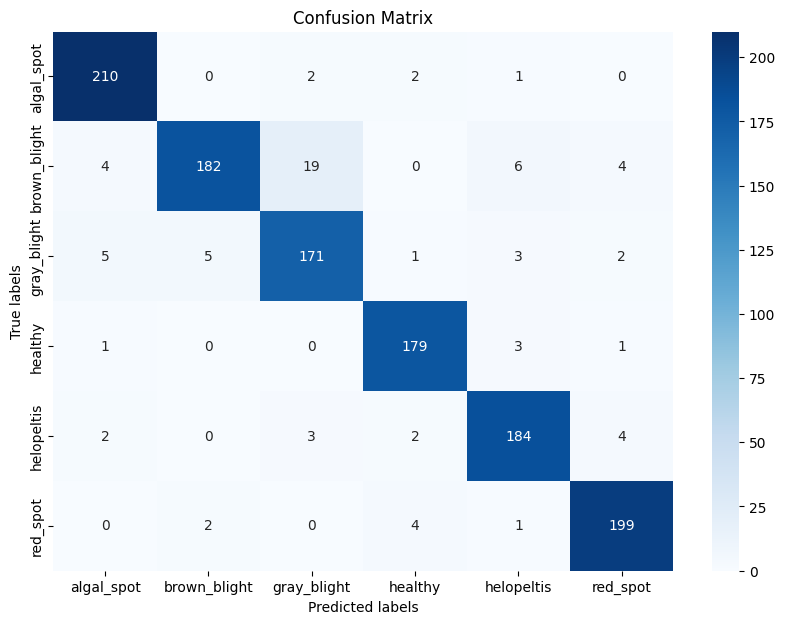

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_pred_svm and y_test are already defined from your model's predictions and the true labels
target_names = ['algal_spot', 'brown_blight', 'gray_blight', 'healthy', 'helopeltis', 'red_spot']

# Generate the classification report
print(classification_report(y_test_encoded, y_pred_xgb1, target_names=target_names))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded,y_pred_xgb1)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

param_dist_adjusted = {
    'n_estimators': [190, 200, 210],  # Explore around the best
    'learning_rate': [0.09, 0.1, 0.11],  # Fine-tune for more precise learning
    'max_depth': [4, 5, 6],  # Check if slightly deeper or shallower trees work better
    'colsample_bytree': [0.75, 0.8, 0.85],  # Fine-tune feature sampling
    'subsample': [0.75, 0.8, 0.85]  # Fine-tune instance sampling
}

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softprob', eval_metric='mlogloss', random_state=42, use_label_encoder=False)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=param_dist_adjusted, n_iter=10, scoring='accuracy', cv=3, verbose=3, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV to the training data
random_search.fit(x_tr, y_train_encoded)

# Print the best parameters and the best score achieved during RandomizedSearch
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Cross-validation Score: {random_search.best_score_ * 100:.2f}%")

# Retrieve the best model from RandomizedSearch
best_xgb_classifier = random_search.best_estimator_

# Predict on the test data using the best model
y_pred_xgb_best = best_xgb_classifier.predict(x_te)

# Calculate the accuracy of the best classifier on the test data
best_xgb_accuracy = accuracy_score(y_test_encoded, y_pred_xgb_best)
print(f"Best XGB Test Accuracy: {best_xgb_accuracy * 100:.2f}%")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'subsample': 0.75, 'n_estimators': 210, 'max_depth': 6, 'learning_rate': 0.09, 'colsample_bytree': 0.75}
Best Cross-validation Score: 98.86%
Best XGB Test Accuracy: 97.84%


              precision    recall  f1-score   support

  algal_spot       0.99      0.98      0.98       215
brown_blight       0.97      0.97      0.97       215
 gray_blight       0.99      0.95      0.97       187
     healthy       0.97      0.99      0.98       184
  helopeltis       0.97      0.99      0.98       195
    red_spot       0.99      0.99      0.99       206

    accuracy                           0.98      1202
   macro avg       0.98      0.98      0.98      1202
weighted avg       0.98      0.98      0.98      1202



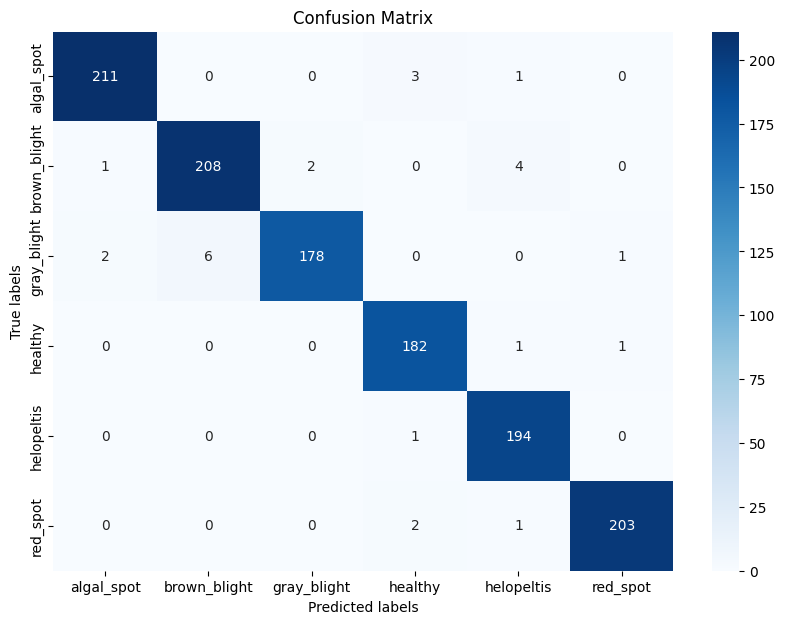

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_pred_svm and y_test are already defined from your model's predictions and the true labels
target_names = ['algal_spot', 'brown_blight', 'gray_blight', 'healthy', 'helopeltis', 'red_spot']

# Generate the classification report
print(classification_report(y_test_encoded, y_pred_xgb_best, target_names=target_names))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded,y_pred_xgb_best)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.ensemble import VotingClassifier

# Initialize individual classifiers with their best parameters found from GridSearchCV/RandomizedSearchCV
svm_best = best_svm_classifier
rf_best = best_rf_classifier_simplified
knn_best = best_knn_classifier
xgb_best = best_xgb_classifier

# Create the ensemble model with hard voting
voting_clf_hard = VotingClassifier(estimators=[
    ('svm', svm_best), ('rf', rf_best), ('knn', knn_best), ('xgb', xgb_best)],
    voting='hard')

# Fit the model
voting_clf_hard.fit(x_tr, y_train)

# Predict on the test data
y_pred_hard = voting_clf_hard.predict(x_te)

# Calculate the accuracy
hard_accuracy = accuracy_score(y_test, y_pred_hard)
print(f"Hard Voting Classifier Test Accuracy: {hard_accuracy * 100:.2f}%")




Hard Voting Classifier Test Accuracy: 98.42%


              precision    recall  f1-score   support

  algal_spot       0.98      1.00      0.99       215
brown_blight       0.97      0.98      0.97       215
 gray_blight       0.99      0.95      0.97       187
     healthy       0.98      0.99      0.99       184
  helopeltis       0.98      0.99      0.99       195
    red_spot       1.00      0.99      0.99       206

    accuracy                           0.98      1202
   macro avg       0.98      0.98      0.98      1202
weighted avg       0.98      0.98      0.98      1202



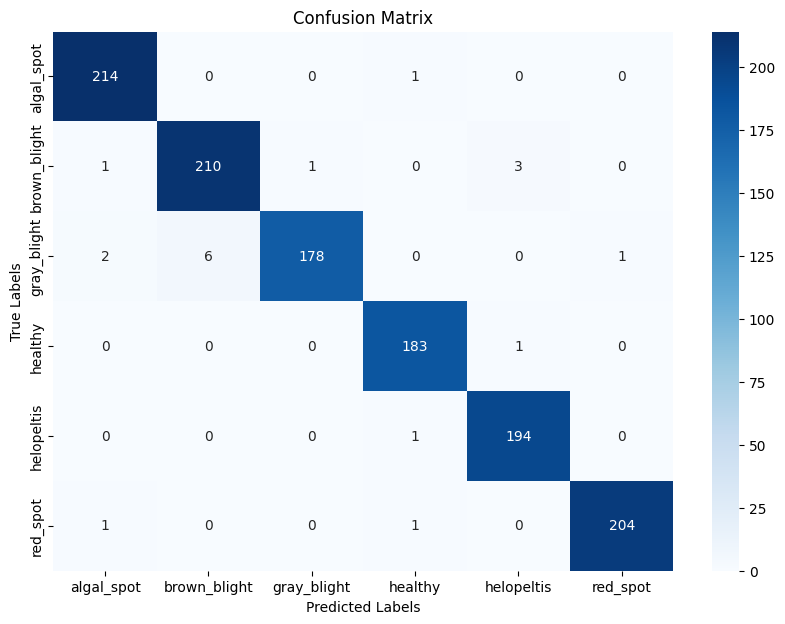

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_pred_soft contains the predictions from your best weighted voting classifier
# and y_test contains the true labels

# Generate the classification report
print(classification_report(y_test, y_pred_hard, target_names=['algal_spot', 'brown_blight', 'gray_blight', 'healthy', 'helopeltis', 'red_spot']))

# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_hard)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['algal_spot', 'brown_blight', 'gray_blight', 'healthy', 'helopeltis', 'red_spot'],
            yticklabels=['algal_spot', 'brown_blight', 'gray_blight', 'healthy', 'helopeltis', 'red_spot'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Note: You need to re-initialize and train the SVM classifier with probability=True if not already done
svm_best_prob = SVC(kernel='rbf', C=5, gamma='scale', probability=True)
svm_best_prob.fit(x_tr, y_train)

# Create the ensemble model with soft voting
voting_clf_soft = VotingClassifier(estimators=[
    ('svm', svm_best_prob), ('rf', rf_best), ('knn', knn_best), ('xgb', xgb_best)],
    voting='soft')

# Fit the model
voting_clf_soft.fit(x_tr, y_train)

# Predict on the test data
y_pred_soft1 = voting_clf_soft.predict(x_te)

# Calculate the accuracy
soft_accuracy = accuracy_score(y_test, y_pred_soft1)
print(f"Soft Voting Classifier Test Accuracy: {soft_accuracy * 100:.2f}%")


Soft Voting Classifier Test Accuracy: 98.25%


              precision    recall  f1-score   support

  algal_spot       0.98      0.99      0.99       215
brown_blight       0.97      0.98      0.97       215
 gray_blight       0.99      0.95      0.97       187
     healthy       0.98      0.99      0.99       184
  helopeltis       0.97      0.99      0.98       195
    red_spot       0.99      0.99      0.99       206

    accuracy                           0.98      1202
   macro avg       0.98      0.98      0.98      1202
weighted avg       0.98      0.98      0.98      1202



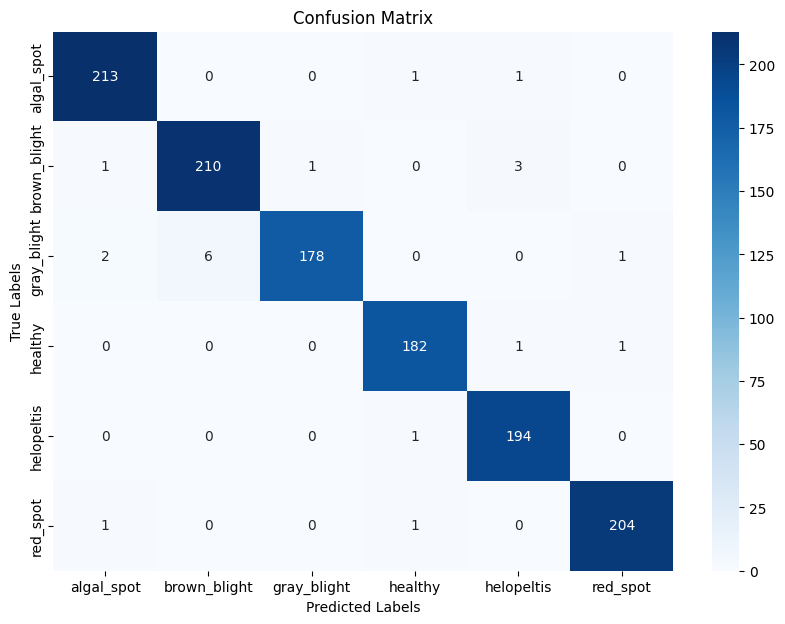

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_pred_soft contains the predictions from your best weighted voting classifier
# and y_test contains the true labels

# Generate the classification report
print(classification_report(y_test, y_pred_soft1, target_names=['algal_spot', 'brown_blight', 'gray_blight', 'healthy', 'helopeltis', 'red_spot']))

# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_soft1)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['algal_spot', 'brown_blight', 'gray_blight', 'healthy', 'helopeltis', 'red_spot'],
            yticklabels=['algal_spot', 'brown_blight', 'gray_blight', 'healthy', 'helopeltis', 'red_spot'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define the base models
base_models = [
    ('svm', svm_best_prob),
    ('rf', rf_best),
    ('knn', knn_best),
    ('xgb', xgb_best)
]

# Define the meta-model
meta_model = LogisticRegression()

# Create the stacking ensemble
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit and evaluate the stacking ensemble
stacking_clf.fit(x_tr, y_train)
y_pred_stacking = stacking_clf.predict(x_te)
accuracy = accuracy_score(y_test, y_pred_stacking)
print(f"Stacking Classifier Test Accuracy: {accuracy * 100:.2f}%")


Stacking Classifier Test Accuracy: 98.59%


              precision    recall  f1-score   support

  algal_spot       0.98      1.00      0.99       215
brown_blight       1.00      0.99      0.99       215
 gray_blight       0.97      0.98      0.98       187
     healthy       0.98      0.99      0.99       184
  helopeltis       0.99      0.97      0.98       195
    red_spot       1.00      0.99      0.99       206

    accuracy                           0.99      1202
   macro avg       0.99      0.99      0.99      1202
weighted avg       0.99      0.99      0.99      1202



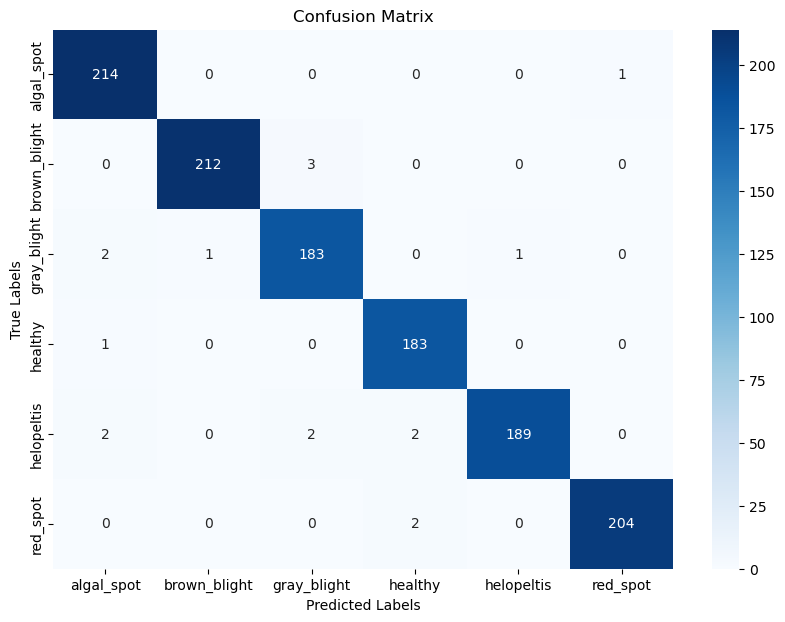

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_pred_soft contains the predictions from your best weighted voting classifier
# and y_test contains the true labels

# Generate the classification report
print(classification_report(y_test, y_pred_stacking, target_names=['algal_spot', 'brown_blight', 'gray_blight', 'healthy', 'helopeltis', 'red_spot']))

# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_stacking)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['algal_spot', 'brown_blight', 'gray_blight', 'healthy', 'helopeltis', 'red_spot'],
            yticklabels=['algal_spot', 'brown_blight', 'gray_blight', 'healthy', 'helopeltis', 'red_spot'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


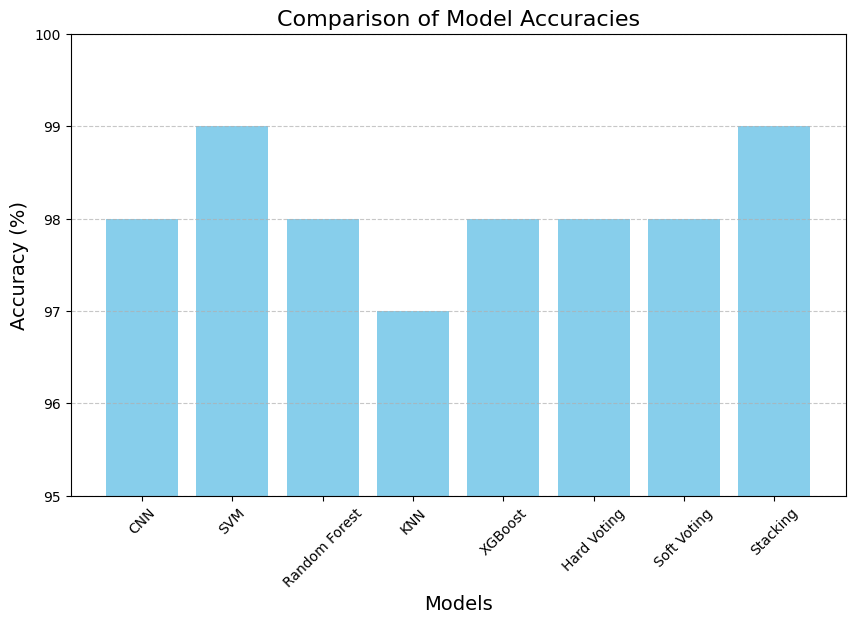

In [ ]:
import matplotlib.pyplot as plt

# Accuracies of different models
model_names = ['CNN', 'SVM', 'Random Forest', 'KNN', 'XGBoost', 'Hard Voting', 'Soft Voting', 'Stacking']
model_accuracies = [98, 99, 98, 97, 98, 98, 98, 99]

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, model_accuracies, color='skyblue')
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.title('Comparison of Model Accuracies', fontsize=16)
plt.ylim([95, 100])  # Adjust the y-axis to show more detail
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for better readability
plt.show()
